<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [2]:
!nvidia-smi

Tue Jun 23 04:10:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [4]:
!pip install h2o

     |████████████████████████████████| 128.4MB 43kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.5-py2.py3-none-any.whl size=128410595 sha256=123f23db7541c35c6206786f9c2126da16aaf360617a50f201cc4fb71c668409
  Stored in directory: /root/.cache/pip/wheels/52/ac/34/be36def52a75ce00aadf2312a66db43e1bb6226e0d4cc51905
Successfully built h2o


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.2
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzyl73o16
  JVM stdout: /tmp/tmpzyl73o16/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzyl73o16/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_avgh8g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [8]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [9]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
df.shape
df.dtypes

Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                     float64
dtype: object

In [14]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
hdf = h2o.import_file(OUTPUT_FILE)
hdf.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0,0,0,0,0,0
111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0,0,0,0,0,0
111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0,0,0,0,0,0
111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0,0,0,0,0,0
111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0,0,0,0,0,0
111749,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:50:00,0,0,0,0,0,0
111750,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:00:00,0,0,0,0,0,0
111751,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:10:00,0,0,0,0,0,0
111752,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:20:00,0,0,0,0,0,0
111753,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:30:00,0,0,0,0,0,0


In [16]:
#df.dtypes
hdf.types

{'C1': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'int'}

In [17]:
df.describe()

,Unnamed: 0,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
count,3.949550e+05,394954.000000,394954.000000,394954.000000,394954.000000,394954.000000,394954.000000
mean,8.291538e+05,2.465745,2.465743,17.205756,0.197152,-0.020987,0.001479
std,8.195231e+05,554.537535,554.537535,811.842638,8.643534,0.151466,0.038425
min,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.044985e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.110250e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.515236e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.603542e+06,158862.000000,158862.000000,157649.000000,600.000000,15.000000,1.000000


In [19]:
hdf.describe()

Rows:418236
Cols:9




,C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,0.0,,1590969600000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,793511.1284442302,,1591314867902.3425,2.327764707007529,2.3277623160129703,16.348165505039027,0.18853993568209254,-0.0205195643597499,0.001446555166353844
maxs,2603542.0,,1591660200000.0,158862.0,158862.0,157649.0,600.0,15.0,1.0
sigma,809806.7707336968,,199550078.3015735,538.8820424095395,538.8820424132123,789.0362076773629,8.450542371255045,0.14967795318634017,0.038006132376543884
zeros,1,,0,408408,408408,394443,408601,409418,417630
missing,0,0,0,0,0,1,1,1,1
0,111744.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [35]:
y = "nvoc"
x = hdf.columns
x.remove(y)
x.remove('C1')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

#Create model

In [36]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "GBM", "DeepLearning", "GLM", "DRF" ], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [24]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
04:19:13.473: Project: AutoML_20200623_41913463
04:19:13.474: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:19:13.474: Setting stopping tolerance adaptively based on the training frame: 0.0018486278060750331
04:19:13.475: Build control seed: 10
04:19:13.475: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
04:19:14.95: training frame: Frame key: automl_training_py_3_sid_8f64    cols: 9    rows: 263253  chunks: 8    size: 1969571  checksum: -9109951074493717884
04:19:14.95: validation frame: Frame key: py_5_sid_8f64    cols: 9    rows: 62692  chunks: 8    size: 508724  checksum: -6102850911337396936
04:19:14.116: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_8f64    cols: 9    rows: 29365  chunks: 8    size: 271800  checksum: -5445050965157802832
04:19:14.116: blending frame: NULL
04:19:14.116: response column: nvoc

In [25]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20200623_041913,0.00161509,0.0401882,0.00161509,0.00303912,0.0278716
XGBoost_3_AutoML_20200623_041913,0.00162507,0.0403122,0.00162507,0.00307693,0.0280261
GBM_4_AutoML_20200623_041913,0.00162613,0.0403253,0.00162613,0.00307286,0.0279915
DRF_1_AutoML_20200623_041913,0.00162707,0.040337,0.00162707,0.00306928,0.0280079
GBM_2_AutoML_20200623_041913,0.00162818,0.0403507,0.00162818,0.00305788,0.0280071
GBM_5_AutoML_20200623_041913,0.00162981,0.0403709,0.00162981,0.00308475,0.0280169
GBM_3_AutoML_20200623_041913,0.00163129,0.0403892,0.00163129,0.00306875,0.0280498
GLM_1_AutoML_20200623_041913,0.00163219,0.0404004,0.00163219,0.00307738,0.0280103
XGBoost_1_AutoML_20200623_041913,0.00165984,0.0407411,0.00165984,0.00340776,0.0285653
XGBoost_2_AutoML_20200623_041913,0.00169149,0.0411277,0.00169149,0.00418934,0.029113


#Test

In [26]:
data_pred=aml.leader.predict(data_test)
data_pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.000389107
0.000389107
0.000389107
0.000389107
0.000389107
0.000389107
0.000389107
0.000896756
0.00150761
0.00115455


# Performance check


In [27]:
aml.leader.model_performance(data_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0015046166769497138
RMSE: 0.03878938871585519
MAE: 0.00293218665752672
RMSLE: 0.02694746392704314
Mean Residual Deviance: 0.0015046166769497138


#나머지 모델도 테스트

In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['GBM_1_AutoML_20200623_041913',
 'XGBoost_3_AutoML_20200623_041913',
 'GBM_4_AutoML_20200623_041913',
 'DRF_1_AutoML_20200623_041913',
 'GBM_2_AutoML_20200623_041913',
 'GBM_5_AutoML_20200623_041913',
 'GBM_3_AutoML_20200623_041913',
 'GLM_1_AutoML_20200623_041913',
 'XGBoost_1_AutoML_20200623_041913',
 'XGBoost_2_AutoML_20200623_041913']

In [29]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

In [30]:
#h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
h2o.get_model([i for i in model_ids if "GBM" in i][0])

IndexError: ignored

In [31]:
#dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
dl = h2o.get_model([i for i in model_ids if "GBM" in i][0])

In [32]:
dl.confusion_matrix()

AttributeError: ignored

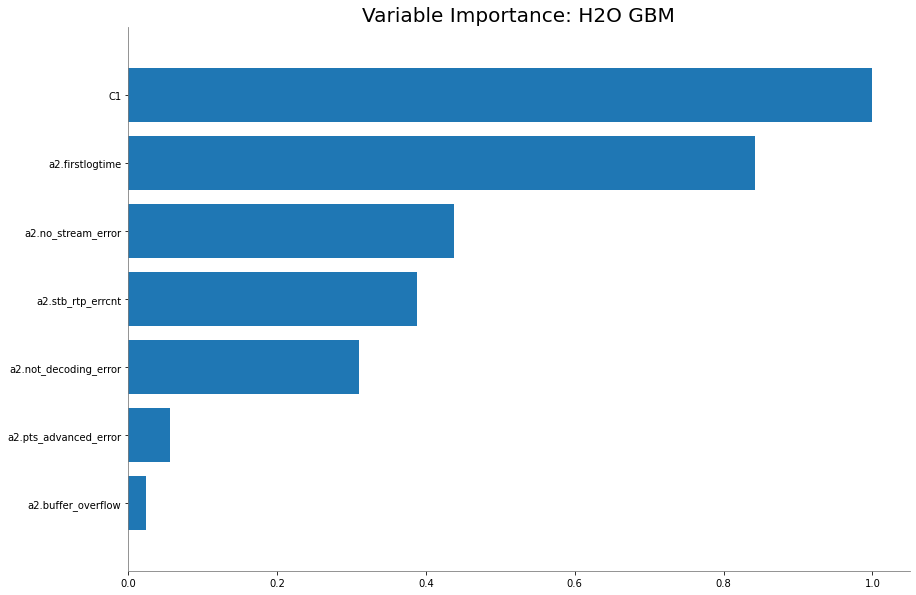

In [33]:
dl.varimp_plot()

#모델 저장

In [ ]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/DRF_1_AutoML_20200622_014252.zip'